# Key Economic Indicators - Australian Economy

## Python set-up

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import readabs as ra
from readabs import metacol as mc

import mgplot as plot

pd.set_option("display.max_columns", 10)
pd.set_option("display.max_rows", 100)

In [2]:
# save charts in this notebook
CHART_DIR = "./CHARTS/Economy/"
plot.set_chart_dir(CHART_DIR)
plot.clear_chart_dir()

## Data acquistition

In [3]:
table = "1364015003"
cat = "1364.0.15.003"
d, m = ra.read_abs_cat(cat=cat, single_excel_only=table)

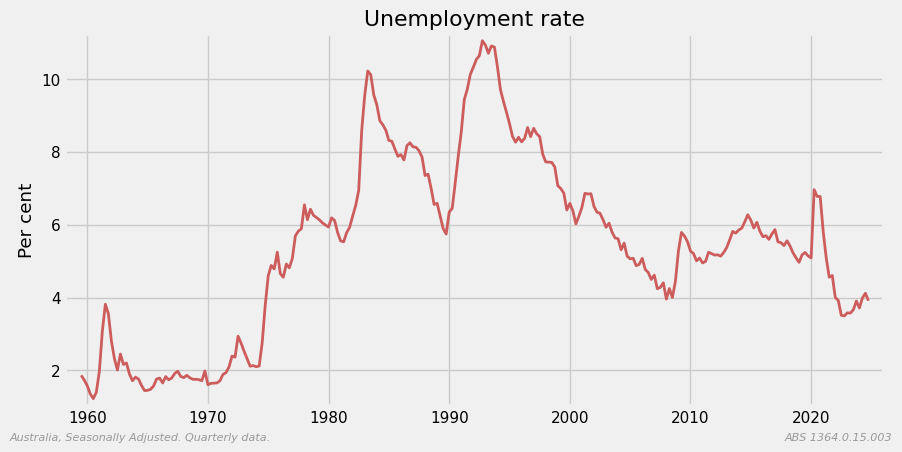

In [4]:
wanted = ["Total unemployed ;", "Total labour force ;"]
df = pd.DataFrame()
for w in wanted:
    selector = {
        w: mc.did,
        "Seasonally Adjusted": mc.stype,
    }
    table, sid, units = ra.find_abs_id(m, selector)
    (m, selector)
    df[w] = d[table][sid]
series = df[df.columns[0]] / df[df.columns[1]] * 100
plot.line_plot_finalise(
    series,
    title="Unemployment rate",
    ylabel="Per cent",
    lfooter="Australia, Seasonally Adjusted. Quarterly data. ",
    rfooter=f"ABS {cat}",
    width=2,
    show=True,
)